# Load Data

In [1]:
import pandas as pd

In [2]:
df_pivoted = pd.read_csv("malacards_one_hot_encoding_for_decision_tree.csv", encoding ="ISO-8859-1")

In [3]:
len(df_pivoted)

2053

In [4]:
cols = df_pivoted.columns

In [5]:
cols = cols[1:]

In [6]:
df_pivoted = df_pivoted.groupby('ICD10').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,ICD10,1-3 toe syndactyly,1-5 finger complete cutaneous syndactyly,1-5 finger syndactyly,1-5 toe syndactyly,11 pairs of ribs,2-3 finger syndactyly,2-3 toe syndactyly,2nd-5th toe middle phalangeal hypoplasia,3-4 finger syndactyly,...,widow's peak,woolly hair,wormian bones,wrist flexion contracture,wrist pain,wrist swelling,xanthelasma,xanthomatosis,xerostomia,y-shaped metacarpals
0,A18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
len(df_pivoted)

244

In [8]:
x = df_pivoted[cols]
y = df_pivoted['ICD10']

# Trying out our classifier to learn diseases from the symptoms

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [12]:
mnb.score(x_test, y_test)

0.0

# Inferences on train and test split

In [13]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [14]:
mnb_tot.score(x, y)

0.5860655737704918

In [15]:
disease_pred = mnb_tot.predict(x)

In [16]:
disease_real = y.values

In [17]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

Pred: M35 Actual:A35
Pred: A18 Actual:A65
Pred: A18 Actual:A66
Pred: A18 Actual:A79
Pred: A18 Actual:B41
Pred: A18 Actual:B55
Pred: A18 Actual:B67
Pred: A18 Actual:C25
Pred: A18 Actual:C32
Pred: A18 Actual:C69
Pred: A18 Actual:C85
Pred: Q78 Actual:C90
Pred: M35 Actual:C95
Pred: E75 Actual:D47
Pred: A18 Actual:D59
Pred: A18 Actual:D60
Pred: Q77 Actual:E03
Pred: A18 Actual:E06
Pred: Q87 Actual:E30
Pred: M35 Actual:E55
Pred: E77 Actual:E72
Pred: G71 Actual:E74
Pred: Q87 Actual:E79
Pred: Q87 Actual:F72
Pred: Q87 Actual:F84
Pred: A18 Actual:G03
Pred: Q87 Actual:G12
Pred: G11 Actual:G23
Pred: A18 Actual:G37
Pred: E77 Actual:G40
Pred: A18 Actual:G72
Pred: Q03 Actual:G91
Pred: Q03 Actual:G93
Pred: Q87 Actual:H02
Pred: A18 Actual:H05
Pred: A18 Actual:H35
Pred: G71 Actual:H49
Pred: Q87 Actual:H50
Pred: A18 Actual:H70
Pred: A18 Actual:I09
Pred: M31 Actual:I28
Pred: E85 Actual:I88
Pred: E75 Actual:J33
Pred: A18 Actual:J39
Pred: M35 Actual:J84
Pred: Q87 Actual:K03
Pred: A18 Actual:K05
Pred: A18 Act

# Training a decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [19]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.8073770491803278


In [27]:
from sklearn import tree 
from sklearn.tree import export_graphviz

# full tree
export_graphviz(dt, 
                out_file='DOT-files/tree.dot', 
                feature_names=cols,
                class_names=y,
                filled=True, 
                rounded=True,)

Go to DOT-files folder to run the cmd: `dot -Tpdf tree.dot -o tree.pdf`

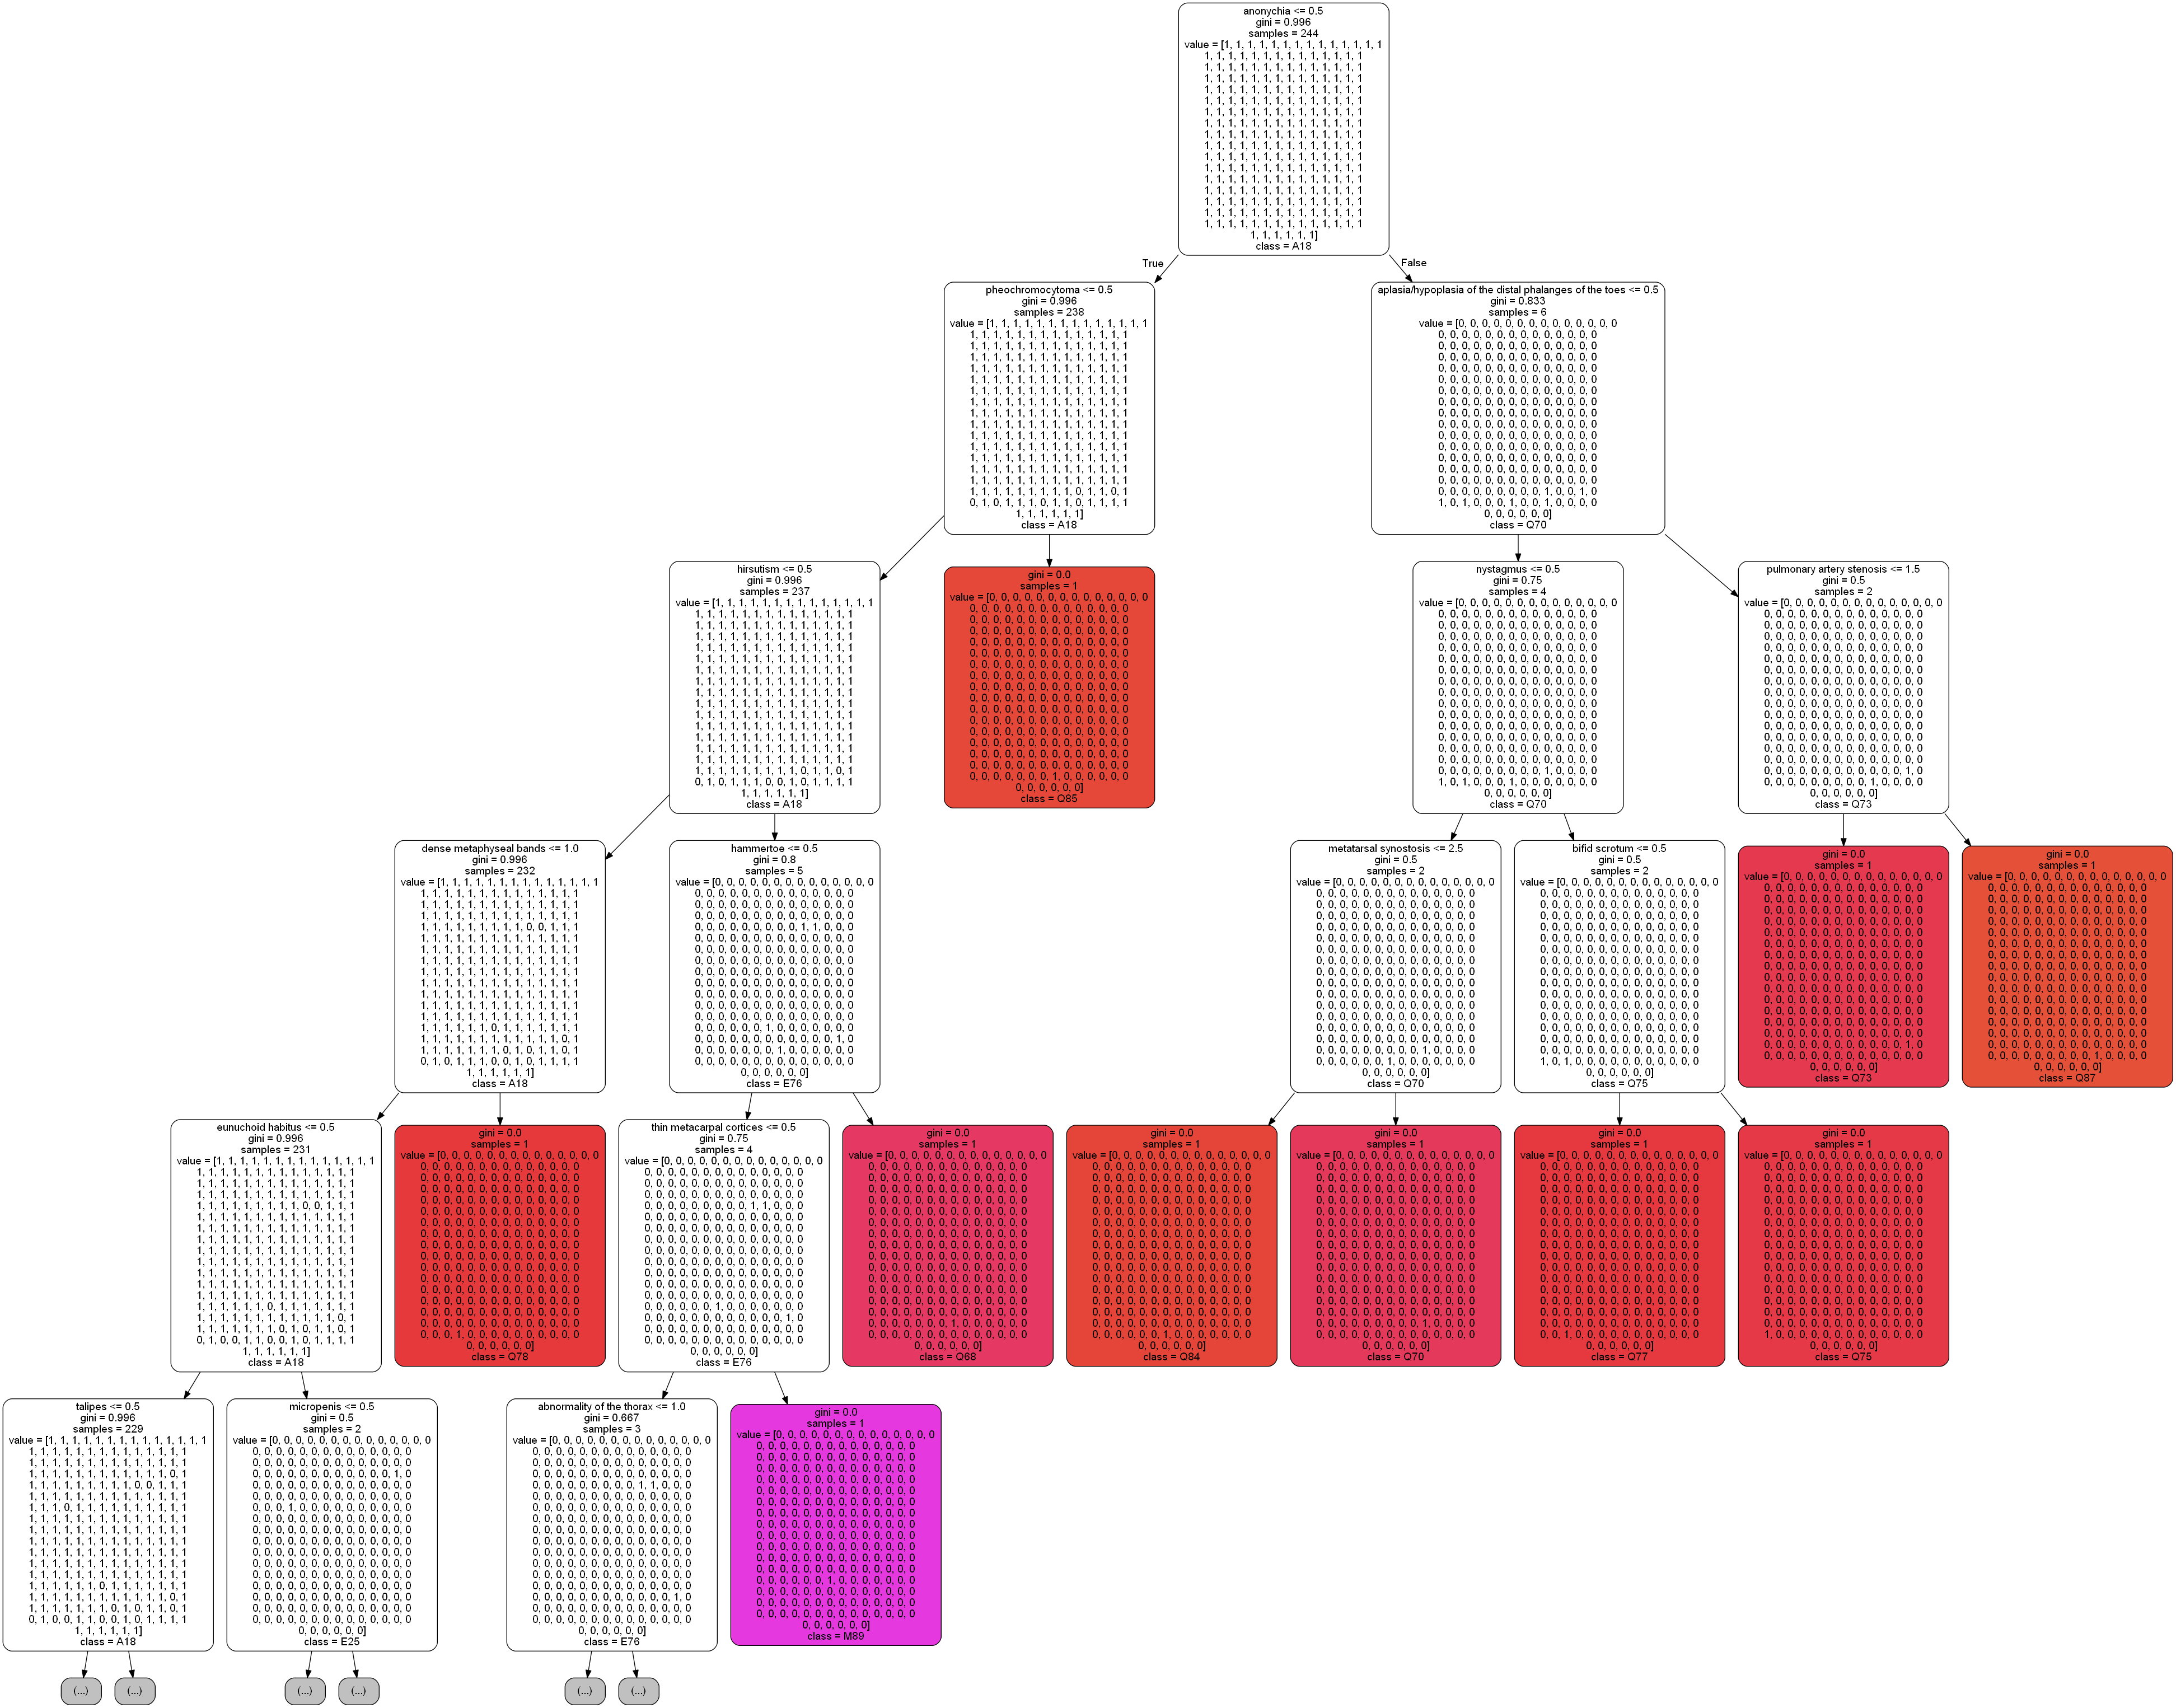

In [36]:
import pydotplus
from IPython.display import Image

# depth 5 tree
dot_data = export_graphviz(dt, 
                            out_file=None, 
                            feature_names=cols,
                            class_names=y,
                            filled=True,
                            rounded=True,
                            max_depth = 5,)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  